## Unsupervised Learning
Here we are going to consider the algorithms which we mostly work to define the paterns in the dataset or to extract those patterns out of the dataset by implementung vivid techniques on the dataset and hence we use varied types of algorithms that work well on different type of datasets. The main idea of unsupervised learning is the we have been given a dataset with no labels but with particular features and we need to extract out meaning from the dataset that how does these features affect the patterns in the dataset.Therefore we are going to learn different algorithms such as K-Means, K-Means++ and DBSCAN.

## K-Means 
This is a type of **Prototype-based Clustering**.This is the most widely used algorithms when we consider cases for unsupervised learning and we group different objects by the means of their neighbors present and on the basis of some distance metric and keep on assigning groups to all the points until we get the whole dataset classified in particular groups.One downside of this algorithm is that we need to give the number of groups or clusters in the datasets a priori and hence we would have to use different group numbers to check if the algorithm captures the features of the dataset.This algorithm also uses different methods to initialize the first cluster centers and other charasteristics as to increase the accuracy of the model

## K-Means ++ 
This is an extension of the normal K-Means algorithm and it tends to work better on datasets in general and the main difference between these algorithms is that in K-Means we assign the initial cluster centroids in random locations and due to that the algorithm might get a sub-optimal solution but in K-means++ we tend to initialize the initial cluster centroids as far away as possible from each other and hence would be able to define better clusters so that we get optimal solution

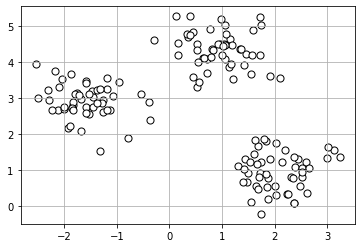

In [1]:
## Importing a dataset and visualizing it
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X,y = make_blobs(n_samples = 150,n_features= 2,centers = 3,cluster_std = 0.5,shuffle = True,random_state = 0)
plt.scatter(X[:,0],X[:,1],c = 'white',marker = 'o',edgecolor = 'black',s  =50)
plt.grid()
plt.show()
## Since here we have a 2-D dataset we can easily visualize it and see what
## number for cluster would work best but in cases of high features it would be really hard to

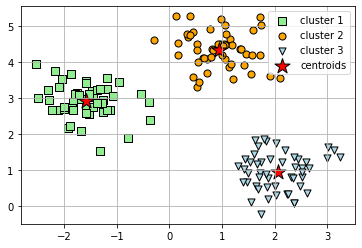

In [4]:
## using the required algorithm on the dataset
from sklearn.cluster import KMeans
## intentiating and fitting the model on the dataset
km = KMeans(n_clusters = 3,
            init = 'random',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state = 0)
y_km = km.fit_predict(X)

## hence we can visualize that how our model makes different clusters
plt.scatter(X[y_km == 0,0],
            X[y_km == 0,1],
            s = 50,c = 'lightgreen',
            marker = 's',edgecolor = 'black',
            label = 'cluster 1')
plt.scatter(X[y_km == 1,0],
            X[y_km == 1,1],
            s = 50,c = 'orange',
            marker = 'o',edgecolor = 'black',
            label = 'cluster 2')
plt.scatter(X[y_km == 2,0],
            X[y_km == 2,1],
            s = 50,c = 'lightblue',
            marker = 'v',edgecolor = 'black',
            label = 'cluster 3')
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,marker='*',
           c = 'red',edgecolor = 'black',
           label = 'centroids')
plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

## Elbow Method
Elbow method is an important method when we consider the evaluation of K-Means Algorithm and hence we can find a better clusters number in algorithms in which we can't visualize the dataset due to huge amount of features and hence in this metho we use different cluster numbers for the dataset and plot the distortions against the number of clusters and while visualizing the plot we could find a cluster which has a drastic change in the distortions and hence we would say that cluster number would be optimal.

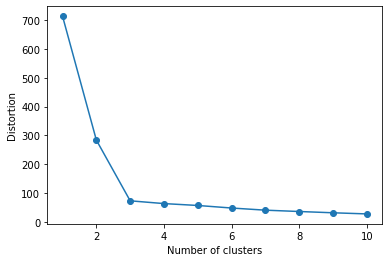

In [5]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters = i,init='k-means++',n_init = 10,max_iter = 300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Silhoutte Plots
Silhoutte Plots are also an important type of plots in which we analyze the quality of different models having different cluster numbers and could be applied to models other that K-Means algorithm.It measures how tightly grouped the samples of clusters are.We can evaluate the Silhoutter Coefficients by measuring the reespective cohesion and ashesion of the datasaet after the clusters have been made and analyze how effective our algorithm is. We can measure that the silhoutte coefficient's are good if their values lies close to 1.

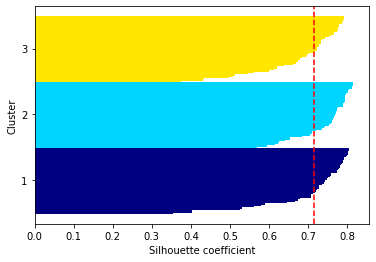

In [6]:
## Plotting the respectice silhoutte coefficients of the model made befire
import numpy as np
from matplotlib.pyplot import cm
from sklearn.metrics import silhouette_samples
km = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 300,n_init = 10,tol = 1e-04,random_state = 0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric = 'euclidean')

y_ax_lower , y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhoutte_vals = silhouette_vals[y_km==c]
    c_silhoutte_vals.sort()
    y_ax_upper += len(c_silhoutte_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhoutte_vals,height = 1.0,edgecolor = 'none',color = color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhoutte_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color = "red",linestyle = '--')
plt.yticks(yticks,cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

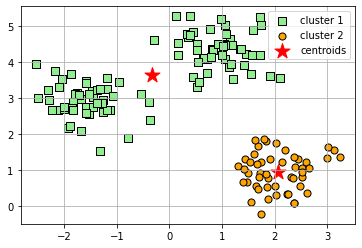

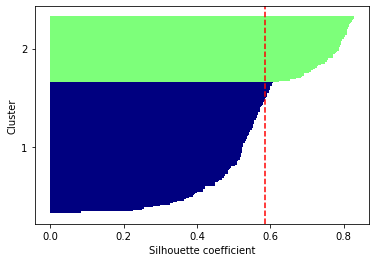

In [7]:
## Here we plot that we chose a sub-optimal solution then how would it look like 
## and how we would get out silhoutte plots
km = KMeans(n_clusters = 2,init = 'k-means++',n_init = 10,max_iter = 300,tol = 1e-04,random_state = 0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,
            c='lightgreen',edgecolor = 'black',marker = 's',label = 'cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,
            c = 'orange',edgecolor = 'black',marker = 'o',label = 'cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker = '*',c='red',label = 'centroids')
plt.legend()
plt.grid()
plt.show()

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km,metric = 'euclidean')

y_ax_lower , y_ax_upper = 0,0
yticks = []
for i,c in enumerate(cluster_labels):
    c_silhoutte_vals = silhouette_vals[y_km==c]
    c_silhoutte_vals.sort()
    y_ax_upper += len(c_silhoutte_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhoutte_vals,height = 1.0,edgecolor = 'none',color = color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhoutte_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color = "red",linestyle = '--')
plt.yticks(yticks,cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

## Hierarchical Tree
Hierarchical Trees are another type of measure for clustering or making a relationship between the different features of the algorithm and hence we can also visualize the respective relationships between different features by plotting the dendograms of the model.Hierarchical Clustering can be modeled in two either Agglomerative or Divisive. In divisive we typically move from one relationship to all the different features by moving down the hierarchy.In aggloremative we start from one feature and relate that to all other features and hence move up by making cluster until we achieve a single cluster and hence in this way we can understand the closeness between different features.

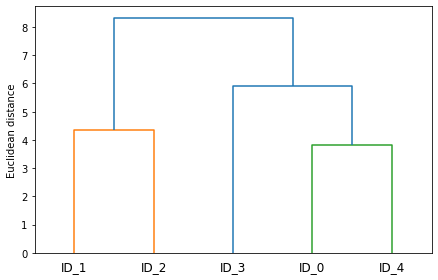

In [9]:
## Here we implement a simple hierarchical tree and pllot dendogram to understand
## how they make relattionships and use the normal functions to evaluate the respective measurements
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

np.random.seed(123)
variables = ['X','Y','Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X,columns = variables,index = labels)
row_dist = pd.DataFrame(squareform(pdist(df,metric = 'euclidean')),columns = labels,index = labels)
row_clusters = linkage(df.values,method = 'complete',metric = 'euclidean')
pd.DataFrame(row_clusters,columns = ['row label 1','row label 2','distance','no. of items in clust.'],index = ['cluster %d' % (i+1) for i in range(row_clusters.shape[0])])
#from scipy.cluster.hierarchy import set_link_color_palette
#set_link_color_palette(['black'])
row_dendr = dendrogram(row_clusters,labels = labels)#,color_threshold=np.inf)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

## Dendograms && Heatmaps
The best to visualize dendograms is to plot them together with heatmaps which also shows how different features measure on a scale and how they are all are related hence would allow us to understandd better realtionships in the model and we would make better clusters

C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


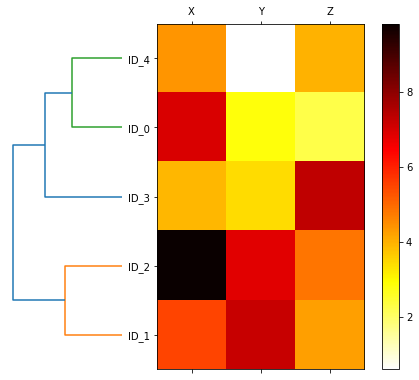

In [15]:
fig = plt.figure(figsize = (8,8),facecolor = 'white')
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters,orientation = 'left')

df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust,interpolation = 'nearest',cmap = 'hot_r')

axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

## Here we are just using the algorithms to classify every datapoint in different
## clusters depending on the number of clusters we want in the dataset and would predict 
## different cluster number for different number of cluster given for each datapoint
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = 'complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 2,affinity = 'euclidean',linkage = 'complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

## High Density Regions with DBSCAN
Density-based Spatial Clustering of Applications with Noise(DBSCAN) and it tends to perform better than the above algorithms that we have defined in some particular and important cases.It depends on the notion of density of points in a particular space and we define these points into three different categories which are Core Points, Border Points and Noise Points and on the basis of these categories we make different clusters on the dataset.The algorithm also does not prespecify that we would need spherical datapoints. This algorithm tends to work better for complex datasets have complex structures.

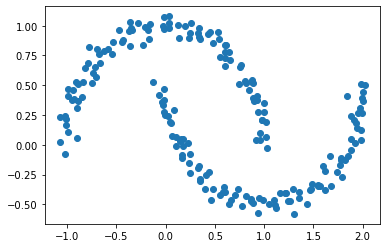

In [16]:
## We take here an famous and in this case important dataset that we check 
## by plotting with different clustering algorithm
from sklearn.datasets import make_moons
X , y = make_moons(n_samples = 200,noise = 0.05,random_state = 0)
plt.scatter(X[:,0],X[:,1])
plt.show()

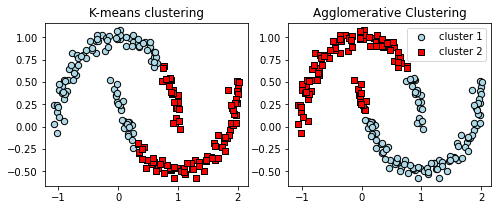

In [17]:
## here we use both the K-means and hierarchy models
f , (ax1,ax2) = plt.subplots(1,2,figsize = (8,3))
km = KMeans(n_clusters = 2,random_state = 0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0],X[y_km==0,1],c='lightblue',edgecolor = 'black',marker = 'o',s = 40,label = 'cluster 1')
ax1.scatter(X[y_km==1,0],X[y_km==1,1],c='red',edgecolor = 'black',marker = 's',s = 40,label = 'cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters = 2,affinity = 'euclidean',linkage = 'complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],X[y_ac==0,1],
            c = 'lightblue',edgecolor = 'black',
            marker = 'o',s=40,label = 'cluster 1')
ax2.scatter(X[y_ac==1,0],X[y_ac==1,1],
            c = 'red',edgecolor = 'black',marker= 's',s = 40,label = 'cluster 2')
ax2.set_title('Agglomerative Clustering')
plt.legend()
plt.show()
## As we can easily see that both the models were not able to give the optimal
## solution and ended up with sub-optimal solutions

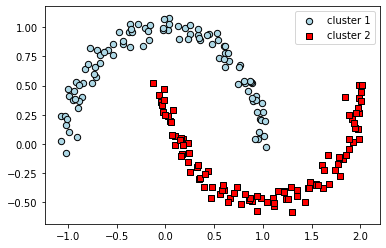

In [38]:
## here we implement the DBSCAN model and we can clearly see that the 
## model gave us the optimal solution with pretty good margin.
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.2,min_samples = 5,metric = 'euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0],X[y_db==0,1],
            c = 'lightblue',edgecolor = 'black',
            marker = 'o',s = 40,
            label = 'cluster 1')
plt.scatter(X[y_db==1,0],X[y_db==1,1],
            c = 'red',edgecolor = 'black',
            marker = 's',s = 40,
            label = 'cluster 2')
plt.legend()
plt.show()